In [2]:
import roadvision3d
import yaml
import os
import numpy as np
import torch

from roadvision3d.src.datasets.rope3d import Rope3D
from roadvision3d.src.engine.model_builder import build_model

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from roadvision3d.visualization import Visualizer



%load_ext autoreload
%autoreload 2

In [9]:
config_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/MonoLSS_Rope3d_150e.yaml'

# load config
assert (os.path.exists(config_path))
cfg = yaml.load(open(config_path, 'r'), Loader=yaml.Loader)

# build dataloader or load de data manually
data = Rope3D(split='trainval', cfg=cfg['dataset'])

Resolution init: [1280  736]


In [11]:
id_num = 6

data_id = data.idx_list[id_num]
data_id = '1632_fa2sd4a11North_420_1612431546_1612432197_2_obstacle'
img = data.get_image(data_id)
labels = data.get_label(data_id)
calib = data.get_calib(data_id)

In [13]:
from roadvision3d.src.datasets.object_3d import Object3d
def get_objects_from_label(label_file):
    with open(label_file, 'r') as f:
        lines = f.readlines()
    objects = [Object3d.from_kitti_line(line) for line in lines]
    return objects

test_dir = '/home/javier/pytorch/RoadVision3D/work_dirs/MonoLSS_Rope3d_150e/output/EPOCH_100/data/1632_fa2sd4a11North_420_1612431546_1612432197_2_obstacle.txt'

labels_test = get_objects_from_label(test_dir)


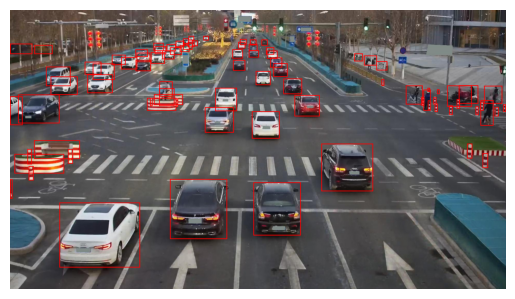

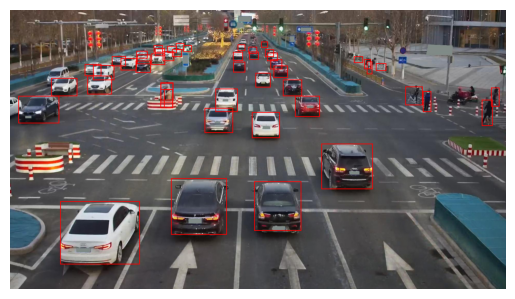

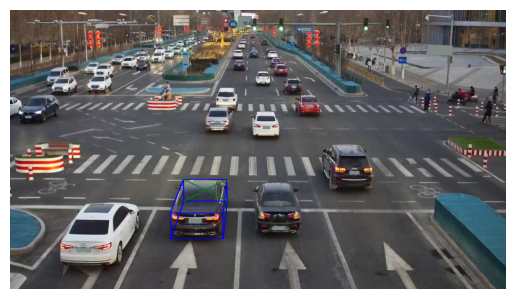

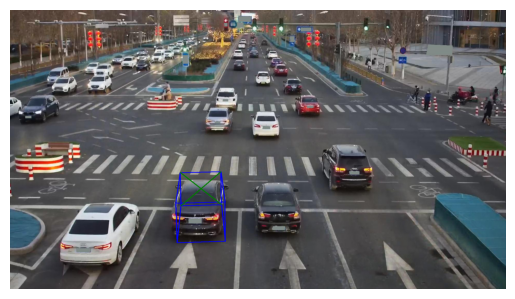

In [33]:
# Initialize the visualizer with calibration data and pitch
visualizer = Visualizer(calib=calib, pitch=0.22)

# Draw 2D bounding boxes on the image
image_with_2d = visualizer.draw_2d_bboxes(img, labels, color='red', width=3, display=True)
image_with_2d_test = visualizer.draw_2d_bboxes(img, labels_test, color='red', width=3, display=True)

# Draw 3D bounding boxes on the image
image_with_3d = visualizer.draw_3d_bboxes(img, labels[6:7], color='blue', color_front='green', width=4, display=True)

image_with_3d_test = visualizer.draw_3d_bboxes(img, labels_test[6:7], color='blue', color_front='green', width=4, display=True)

In [34]:
print(labels[6])
print(labels_test[6])

car 0.000 0.000 -1.494 box2d: [619.9101  654.74133 840.1086  886.9021 ] hwl: [0.948 1.941 4.570] pos: [-2.1131313  2.3758004 23.248865 ] ry: -1.585
car 0.000 0.000 -1.570 box2d: [623.13 651.32 839.82 869.66] hwl: [1.410 1.760 4.280] pos: [-2.08  2.47 22.74] ry: -1.660
